# Dimensionality Reduction and Classification Analysis

### Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

### Reading CSV

In [2]:
df=pd.read_csv('Wine.csv')

### EDA

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


#### no null values

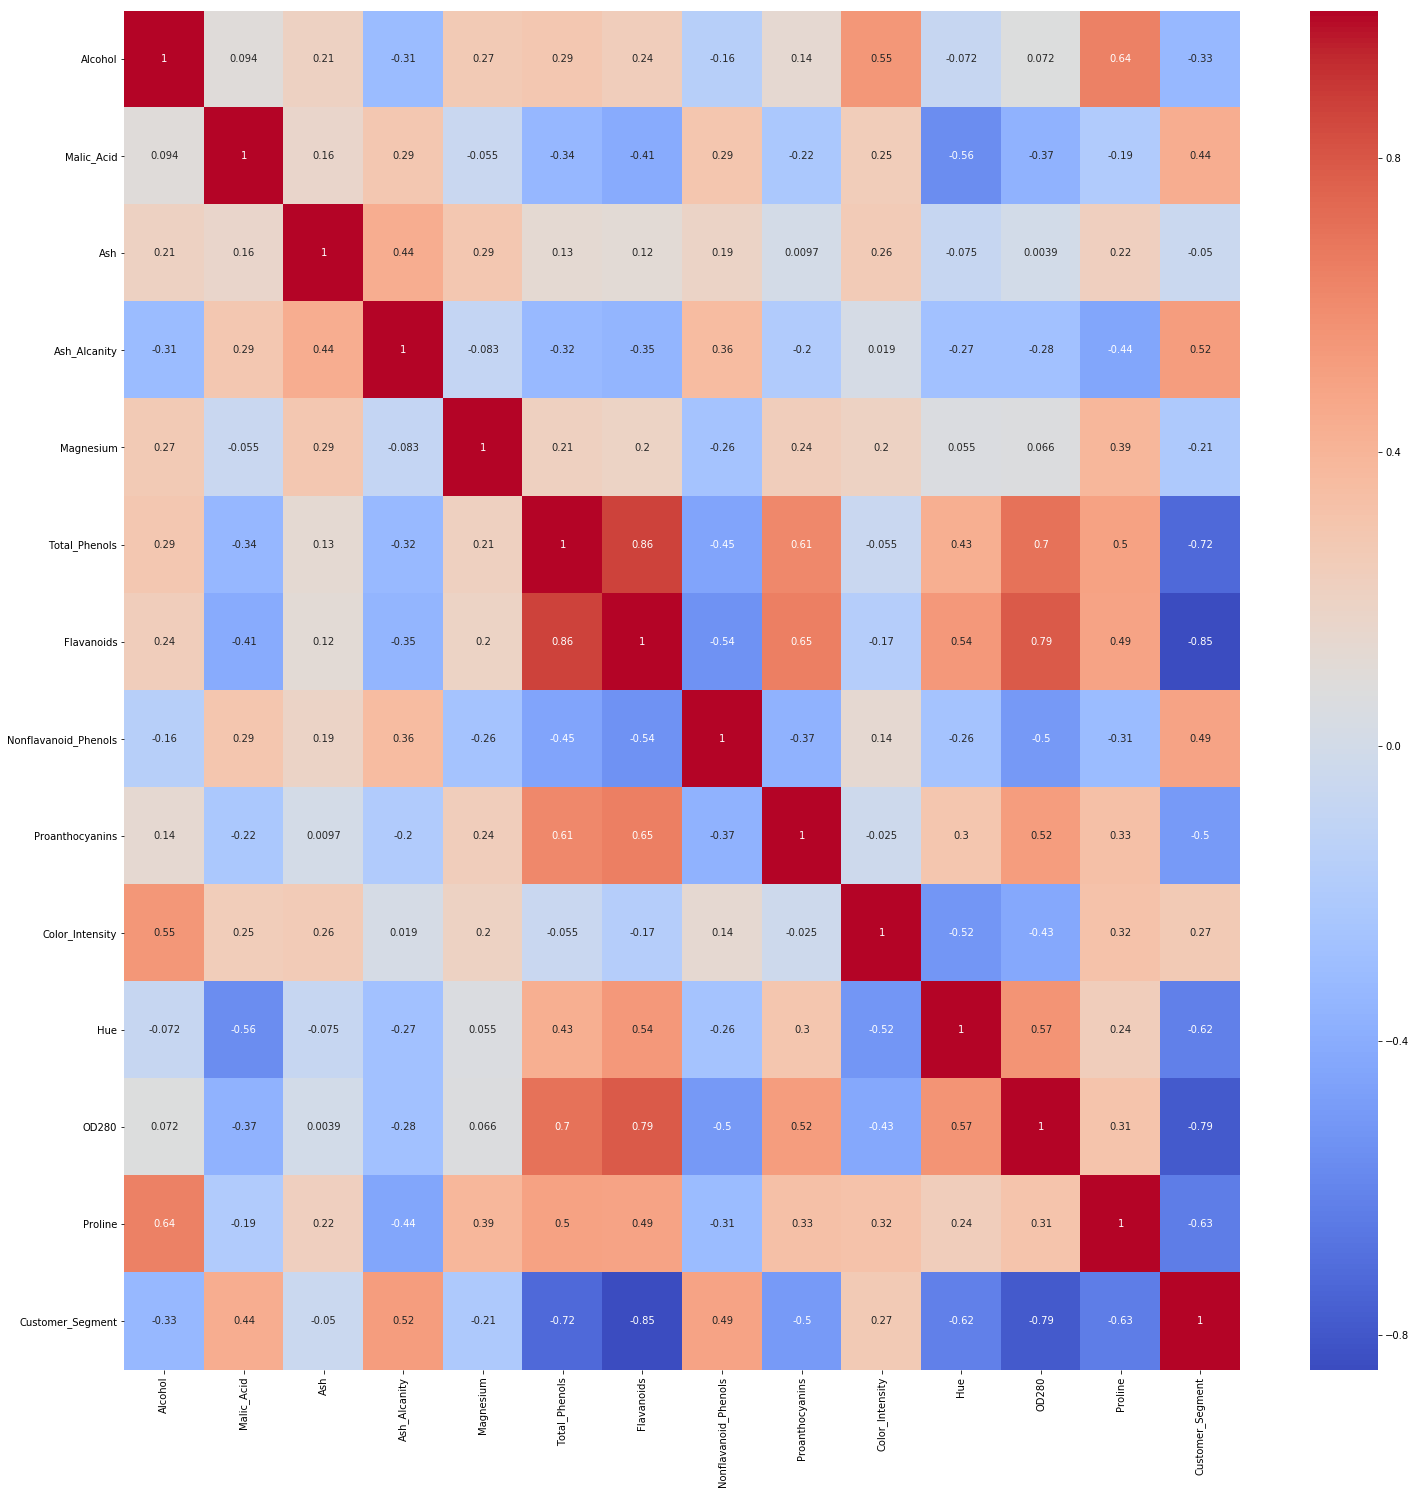

In [6]:
correlation=df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [7]:
X=df.drop('Customer_Segment',axis=1)
y=df['Customer_Segment']

### Scaling the features:

In [8]:
sc=StandardScaler()
X=sc.fit_transform(X)

#### Train test split

In [9]:
(X_train,X_test,Y_train,Y_test)=train_test_split(X,y,test_size=0.30)

# Principal Component Analysis

In [10]:
pca=PCA(0.95)
pca.fit(X_train)
pca.explained_variance_ratio_

array([ 0.36182834,  0.195993  ,  0.12565343,  0.0707449 ,  0.05347506,
        0.04495464,  0.0401952 ,  0.02814348,  0.02189358,  0.01947884])

## taking 3 principal components because explained variance not good enough with just first two components , to get ~0.95 variance required components=10 but then visualization gets impossible and contribution from later components is insignificant thus, we can drop those:

In [11]:
pca=PCA(3)
pca.fit(X_train)
pca.explained_variance_ratio_

array([ 0.36182834,  0.195993  ,  0.12565343])

In [12]:
pca_train=pca.transform(X_train)
pca_test=pca.transform(X_test)

### Training set scatter plot:

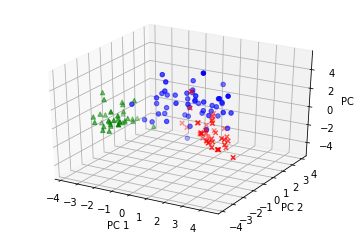

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_train[Y_train==1,0],pca_train[Y_train==1,1],pca_train[Y_train==1,2], c='red', marker='x')
ax.scatter(pca_train[Y_train==2,0],pca_train[Y_train==2,1],pca_train[Y_train==2,2], c='blue', marker='o')
ax.scatter(pca_train[Y_train==3,0],pca_train[Y_train==3,1],pca_train[Y_train==3,2], c='green', marker='^')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.show()

### Test set scatter plot

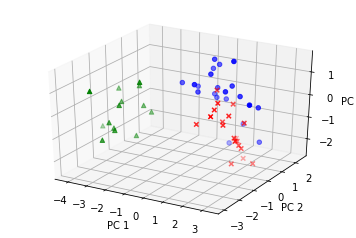

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_test[Y_test==1,0],pca_test[Y_test==1,1],pca_test[Y_test==1,2], c='red', marker='x')
ax.scatter(pca_test[Y_test==2,0],pca_test[Y_test==2,1],pca_test[Y_test==2,2], c='blue', marker='o')
ax.scatter(pca_test[Y_test==3,0],pca_test[Y_test==3,1],pca_test[Y_test==3,2], c='green', marker='^')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.show()

## Since principal components are orthogonal thus, best approach should be Naive Bayes classification with it's independence assumption:

In [15]:
gnb = GaussianNB()
gnb.fit(pca_train,Y_train)

GaussianNB(priors=None)

In [16]:
Ypreds=gnb.predict(pca_test)

In [17]:
gnb.score(pca_test,Y_test)

0.96296296296296291

### 10-fold cross validated score :

In [18]:
scores = cross_val_score(gnb, pca_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())

Scores: [ 1.          1.          0.84615385  1.          1.          1.          1.
  1.          0.83333333  1.        ]
Mean: 0.967948717949


## 96.7% accuracy with PCA and GNB

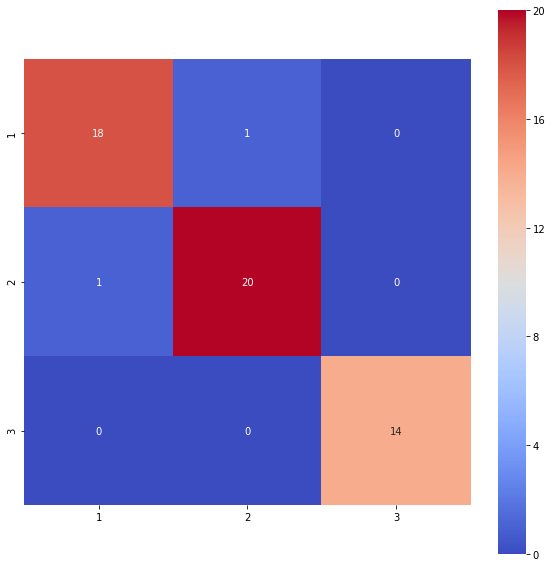

In [19]:
cm = confusion_matrix(Y_test,Ypreds)
xy=np.array([1,2,3])
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,square=True,cmap='coolwarm',xticklabels=xy,yticklabels=xy)

# Linear Discriminant Analysis

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda_train = lda.fit(X_train, Y_train)
lda.explained_variance_ratio_

array([ 0.69523407,  0.30476593])

### when n_components is left to default it chooses components which sum up to a 100% variance , and it's just 2 components with LDA approoach and still it captures 100% variance of data

In [31]:
lda_train=lda.transform(X_train)
lda_test=lda.transform(X_test)

### Scatter plot to visualize training set:

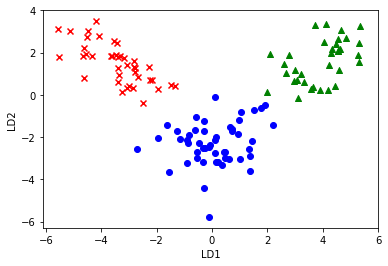

In [32]:
plt.scatter(lda_train[Y_train==1,0],lda_train[Y_train==1,1], c='red', marker='x')
plt.scatter(lda_train[Y_train==2,0],lda_train[Y_train==2,1], c='blue', marker='o')
plt.scatter(lda_train[Y_train==3,0],lda_train[Y_train==3,1], c='green', marker='^')

plt.xlabel('LD1')
plt.ylabel('LD2')

plt.show()

### Scatter plot to visualize test set:

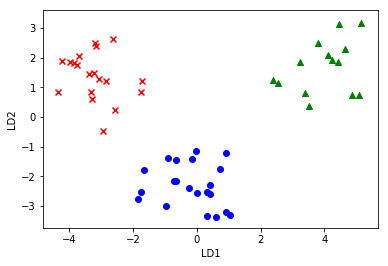

In [33]:
plt.scatter(lda_test[Y_test==1,0],lda_test[Y_test==1,1], c='red', marker='x')
plt.scatter(lda_test[Y_test==2,0],lda_test[Y_test==2,1], c='blue', marker='o')
plt.scatter(lda_test[Y_test==3,0],lda_test[Y_test==3,1], c='green', marker='^')

plt.xlabel('LD1')
plt.ylabel('LD2')

plt.show()

## As we can see LDA has done a great job of maximizing separation between classes:
#### On a data like this with so well separated classes any multi class classifier should do a great job
## Now to check classification score with the discriminate function:
#### which is just a modified form of bayes theorem with gaussian distribution function for estimated probability of x belonging to the class

In [43]:
Ypreds=lda.predict(X_test)
lda.score(X_test,Y_test)

1.0

In [44]:
scores = cross_val_score(lda, lda_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())

Scores: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Mean: 1.0


## 100% accuracy , much better than score from PCA based GNB

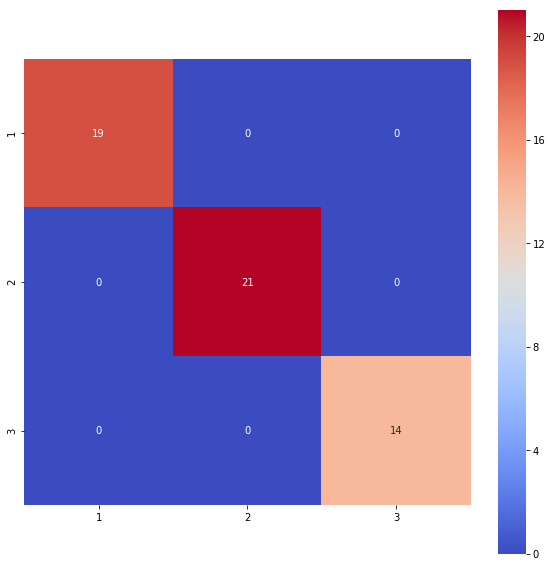

In [46]:
cm = confusion_matrix(Y_test,Ypreds)
xy=np.array([1,2,3])
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,square=True,cmap='coolwarm',xticklabels=xy,yticklabels=xy)